# Task 1

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
!pip install validclust

# Importing all required libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from plotly.subplots import make_subplots
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from validclust import dunn
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# Storing all data files into dataframes using read_csv

In [ ]:
Data1 = pd.read_csv('Data1.csv')
Data2 = pd.read_csv('Data2.csv')
Data3 = pd.read_csv('Data3.csv')
Data4 = pd.read_csv('Data4.csv')
Data5 = pd.read_csv('Data5.csv')
Data6 = pd.read_csv('Data6.csv')
Data7 = pd.read_csv('Data7.csv')
Data8 = pd.read_csv('Data8.csv')

In [ ]:
Data_list = [Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8]

# Shape of all the dataframes

In [ ]:
print(Data1.shape, Data2.shape, Data3.shape, Data4.shape, Data5.shape, Data6.shape, Data7.shape, Data8.shape)

(212, 5) (404, 5) (400, 5) (1000, 5) (800, 5) (4096, 4) (770, 4) (4002, 5)


# Printing first 5 rows of each dataframe

In [ ]:
for i,j in zip(Data_list,range(1,9)):
  print('Data{}: \n'.format(j),i.head())
  print('\n')

Data1: 
    Unnamed: 0        X1        X2        X3  Class
0           1 -0.063274  0.027734  0.022683      1
1           2 -0.000731  0.048211  0.069198      1
2           3 -0.060767 -0.009080  0.053085      1
3           4  0.013252 -0.011876  0.055324      1
4           5 -0.054508 -0.003813  0.001738      1


Data2: 
   Unnamed: 0         X         Y         C  Class
0         X1  3.277701  0.814082  0.326574      1
1         X2  0.387577  0.176780  0.888046      1
2         X3  0.268546  0.582963  0.080981      1
3         X4  2.031145  0.244597  0.643921      1
4         X5  0.188677  0.461280  0.496633      1


Data3: 
    Unnamed: 0        X1        X2        X3  Class
0           1  1.295428  0.050829 -0.385217      1
1           2  1.409178 -0.035191 -0.251980      1
2           3  1.096803  0.246365 -0.415011      1
3           4  1.463328  0.265354 -0.513488      1
4           5  1.603284  0.080577 -0.470257      1


Data4: 
    Unnamed: 0      X1     X2       X3  Class
0

# Checking if any column has missing values. For all the dataframes, we can clearly see that there are 0 null values

In [ ]:
for i,j in zip(Data_list,range(1,9)):
  print('Data{}: \n'.format(j),i.isnull().sum())
  print('\n')

Data1: 
 Unnamed: 0    0
X1            0
X2            0
X3            0
Class         0
dtype: int64


Data2: 
 Unnamed: 0    0
X             0
Y             0
C             0
Class         0
dtype: int64


Data3: 
 Unnamed: 0    0
X1            0
X2            0
X3            0
Class         0
dtype: int64


Data4: 
 Unnamed: 0    0
X1            0
X2            0
X3            0
Class         0
dtype: int64


Data5: 
 Unnamed: 0    0
X1            0
X2            0
X3            0
Class         0
dtype: int64


Data6: 
 Unnamed: 0    0
X1            0
X2            0
Class         0
dtype: int64


Data7: 
 Unnamed: 0    0
X1            0
X2            0
Class         0
dtype: int64


Data8: 
 Unnamed: 0    0
X1            0
X2            0
X3            0
Class         0
dtype: int64




# Number of unique clusters given in the Class column from original datasets

In [ ]:
for i,j in zip(range(1,9),Data_list):
  print('Data{} number of original clusters: '.format(i), j['Class'].unique(), j['Class'].nunique())

Data1 number of original clusters:  [1 2 3 4 5 6 7] 7
Data2 number of original clusters:  [1 2 3 4] 4
Data3 number of original clusters:  [1 2 3 4] 4
Data4 number of original clusters:  [1 2] 2
Data5 number of original clusters:  [1 2] 2
Data6 number of original clusters:  [1 2] 2
Data7 number of original clusters:  [5 4 6 3 1 2] 6
Data8 number of original clusters:  [1] 1


In [ ]:
Data2.rename(columns={'X':'X1','Y':'X2','C':'X3'},inplace=True)

# Creating models for Kmeans and Hierarichal clustering using the number of unique cluster values from 'Class' column for each dataset
###  We fix the random_state input of Kmeans so that multiple runs of the same code yields the same output
### For Hierarichal clustering, we use Agglomerative Clustering function.
### For both models, we add their respective predicted labels (Kmeans Labels, Hierarichal Labels) to the original datasets

In [ ]:
# For all dataframes
for a in Data_list:

  Data_model = KMeans(n_clusters = a['Class'].nunique(),random_state=13)
  Hierarichal_model = AgglomerativeClustering(n_clusters=a['Class'].nunique(), linkage='ward')
  if (a.columns.nunique()==5):
    Data_model.fit(a.iloc[:,1:4])
    Hierarichal_model.fit(a.iloc[:,1:4])
  else:
    Data_model.fit(a.iloc[:,1:3])
    Hierarichal_model.fit(a.iloc[:,1:3])
  a['Kmeans Labels'] = Data_model.labels_
  a['Hierarchical Labels']=Hierarichal_model.labels_
  a['Kmeans Labels'] = a['Kmeans Labels'] + 1
  a['Hierarchical Labels'] = a['Hierarchical Labels'] + 1

# Defining a function which creates subplots of 3D or 2D scatter plots of each datasets' Data points with -
## 1. Original Class Column
## 2. Kmeans Clustering Predicted Labels
## 3. Dendogram of the dataset
## 4. Hierarichal Clustering Predicted labels


In [ ]:
def model_graphs(data):
  if (data.columns.nunique()==7):
    fig = plt.figure(figsize=(22,18))

# Function for 3D plots
# Plot for Original Class labels
    ax = fig.add_subplot(2,2,1, projection='3d')
    ax.scatter(data['X1'],data['X2'],data['X3'],c=data['Class'],cmap='viridis')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.set_title('Original Class with {} clusters'.format(data['Class'].nunique()),size='18')

# Plot for Kmeans labels
    ax = fig.add_subplot(2,2,2, projection='3d')
    ax.scatter(data['X1'],data['X2'],data['X3'],c=data['Kmeans Labels'],cmap='viridis')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.set_title('Kmeans Clustering with {} clusters'.format(data['Kmeans Labels'].nunique()),size='18')

# Dendogram plot
    ax = fig.add_subplot(2,2,3)
    plt.title("Dendrogram",size='18')
    dend = shc.dendrogram(shc.linkage(data.iloc[:,1:4],method='ward'))

#Plot for Hierarichal labels
    ax = fig.add_subplot(2,2,4, projection='3d')
    ax.scatter(data['X1'],data['X2'],data['X3'],c=data['Hierarchical Labels'],cmap='viridis')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.set_title('Hierarichal Clustering with {} clusters'.format(data['Hierarchical Labels'].nunique()),size='18')

    plt.show()

# Code for 2D plots
  else:
    fig = plt.figure(figsize=(20,16))

# Plot for Original Class labels
    ax = fig.add_subplot(2,2,1)
    ax.scatter(data['X1'],data['X2'],c=data['Class'],cmap='viridis')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title('Original Class with {} clusters'.format(data['Class'].nunique()),size='18')

# Plot for Kmeans labels
    ax = fig.add_subplot(2,2,2)
    ax.scatter(data['X1'],data['X2'],c=data['Kmeans Labels'],cmap='viridis')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title('Kmeans Clustering with {} clusters'.format(data['Kmeans Labels'].nunique()),size='18')

# Dendogram plot
    ax = fig.add_subplot(2,2,3)
    plt.title("Dendrogram",size='18')
    dend = shc.dendrogram(shc.linkage(data.iloc[:,1:3],method='ward'))

# Plot for Hierarichal labels
    ax = fig.add_subplot(2,2,4)
    ax.scatter(data['X1'],data['X2'],c=data['Hierarchical Labels'],cmap='viridis')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title('Hierarichal Clustering with {} clusters'.format(data['Hierarchical Labels'].nunique()),size='18')

    plt.show()

# Accuracy Scores of each dataset for both Kmeans labels and Hierarichal Labels
## Accuracy score = (True Positive + True Negative) / (True Positive + True Negative + False Positive + False Negative)

In [ ]:
for i,j in zip(Data_list,range(1,9)):
  print('Data{} accuracy score: '.format(j))
  print('Kmeans Clustering: ',accuracy_score(i['Class'],i['Kmeans Labels']))
  print('Hierarichal Clustering: ',accuracy_score(i['Class'],i['Hierarchical Labels']))
  print('\n')

Data1 accuracy score: 
Kmeans Clustering:  0.2830188679245283
Hierarichal Clustering:  0.14150943396226415


Data2 accuracy score: 
Kmeans Clustering:  0.7252475247524752
Hierarichal Clustering:  0.24752475247524752


Data3 accuracy score: 
Kmeans Clustering:  0.0
Hierarichal Clustering:  0.0


Data4 accuracy score: 
Kmeans Clustering:  0.347
Hierarichal Clustering:  0.201


Data5 accuracy score: 
Kmeans Clustering:  0.2825
Hierarichal Clustering:  0.3425


Data6 accuracy score: 
Kmeans Clustering:  0.951416015625
Hierarichal Clustering:  0.923828125


Data7 accuracy score: 
Kmeans Clustering:  0.003896103896103896
Hierarichal Clustering:  0.1


Data8 accuracy score: 
Kmeans Clustering:  1.0
Hierarichal Clustering:  1.0




# F1 Scores of each dataset for both Kmeans labels and Hierarichal Labels.
## F1 score = 2 * (precision * recall) / (precision + recall),
## where precision = True Positive / (True Positive + False Positive)
## and recall = True Positive / (True Positive + False Positive)

In [ ]:
for i,j in zip(Data_list,range(1,9)):
  print('Data{} f1 score: '.format(j))
  print('Kmeans Clustering: ',f1_score(i['Class'],i['Kmeans Labels'],average='micro'))
  print('Hierarichal Clustering: ',f1_score(i['Class'],i['Hierarchical Labels'],average='micro'))
  print('\n')

Data1 f1 score: 
Kmeans Clustering:  0.2830188679245283
Hierarichal Clustering:  0.14150943396226415


Data2 f1 score: 
Kmeans Clustering:  0.7252475247524752
Hierarichal Clustering:  0.24752475247524752


Data3 f1 score: 
Kmeans Clustering:  0.0
Hierarichal Clustering:  0.0


Data4 f1 score: 
Kmeans Clustering:  0.347
Hierarichal Clustering:  0.201


Data5 f1 score: 
Kmeans Clustering:  0.2825
Hierarichal Clustering:  0.3425


Data6 f1 score: 
Kmeans Clustering:  0.951416015625
Hierarichal Clustering:  0.923828125


Data7 f1 score: 
Kmeans Clustering:  0.003896103896103896
Hierarichal Clustering:  0.10000000000000002


Data8 f1 score: 
Kmeans Clustering:  1.0
Hierarichal Clustering:  1.0




## We cannot be confident in the accuracy score given by the model because the mapping between the labels of the 'Class' column and the labels given by the models might not be the same. Hence, we are getting lower accuracy and F1 score values

# Fowlkes Mallows score for both Kmeans and Hierarichal clustering
## FM score = True Positive / sqrt((True Positive + False Positive) * (True Positive + False Negative))
## FM score checks the similarity of the clusters and gives a higher score if the datapoints are clustered similarly.

In [ ]:
for i,j in zip(Data_list,range(1,9)):
  print('Data{} FM score: '.format(j))
  print('Kmeans Clustering: ',fowlkes_mallows_score(i['Class'],i['Kmeans Labels']))
  print('Hierarichal Clustering: ',fowlkes_mallows_score(i['Class'],i['Hierarchical Labels']))
  print('\n')

Data1 FM score: 
Kmeans Clustering:  1.0
Hierarichal Clustering:  1.0


Data2 FM score: 
Kmeans Clustering:  0.7237292929817782
Hierarichal Clustering:  0.8267843729687627


Data3 FM score: 
Kmeans Clustering:  1.0
Hierarichal Clustering:  0.9753945158961902


Data4 FM score: 
Kmeans Clustering:  0.5459107296389125
Hierarichal Clustering:  0.7042423466085546


Data5 FM score: 
Kmeans Clustering:  0.6559262338078193
Hierarichal Clustering:  0.6462836986049043


Data6 FM score: 
Kmeans Clustering:  0.9076346454086384
Hierarichal Clustering:  0.8602399807978651


Data7 FM score: 
Kmeans Clustering:  0.7923336491757497
Hierarichal Clustering:  0.7948341762290656


Data8 FM score: 
Kmeans Clustering:  1.0
Hierarichal Clustering:  1.0




# Scatter plots and Dendogram of each dataset using the model_graphs function.

# Data1 -
## Hierarichal and Kmeans clustering give us the same scatter plots as the Original Class column

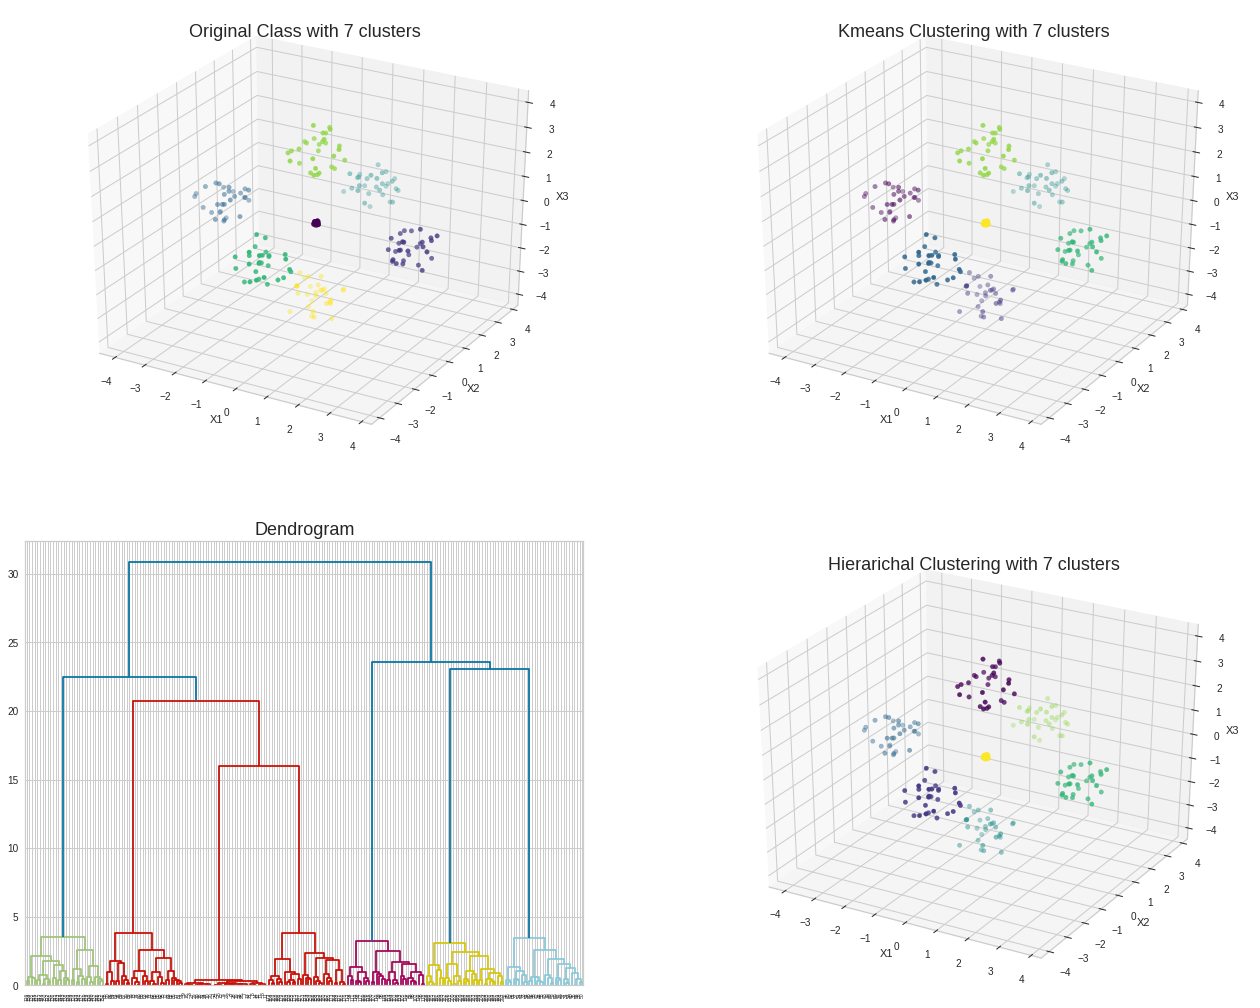

In [ ]:
model_graphs(Data1)

# Data2 -
## Kmeans and Hierarichal clustering give us the same scatter plots but they both are different from the Original Class

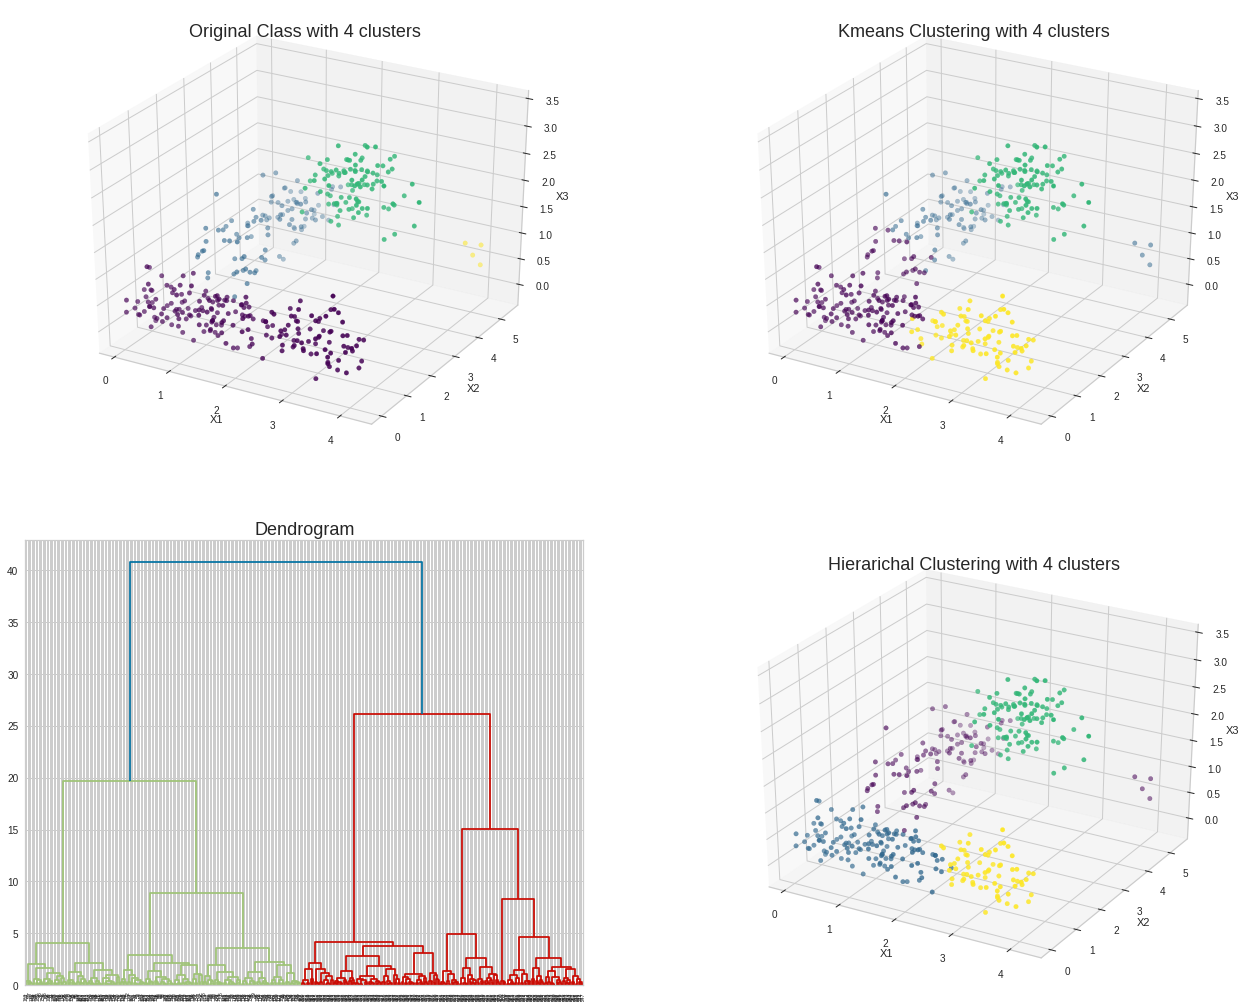

In [ ]:
model_graphs(Data2)

# Data3 -
## Kmeans and Hierarichal clustering give us almost similar scatter plots as each other and the Original Class

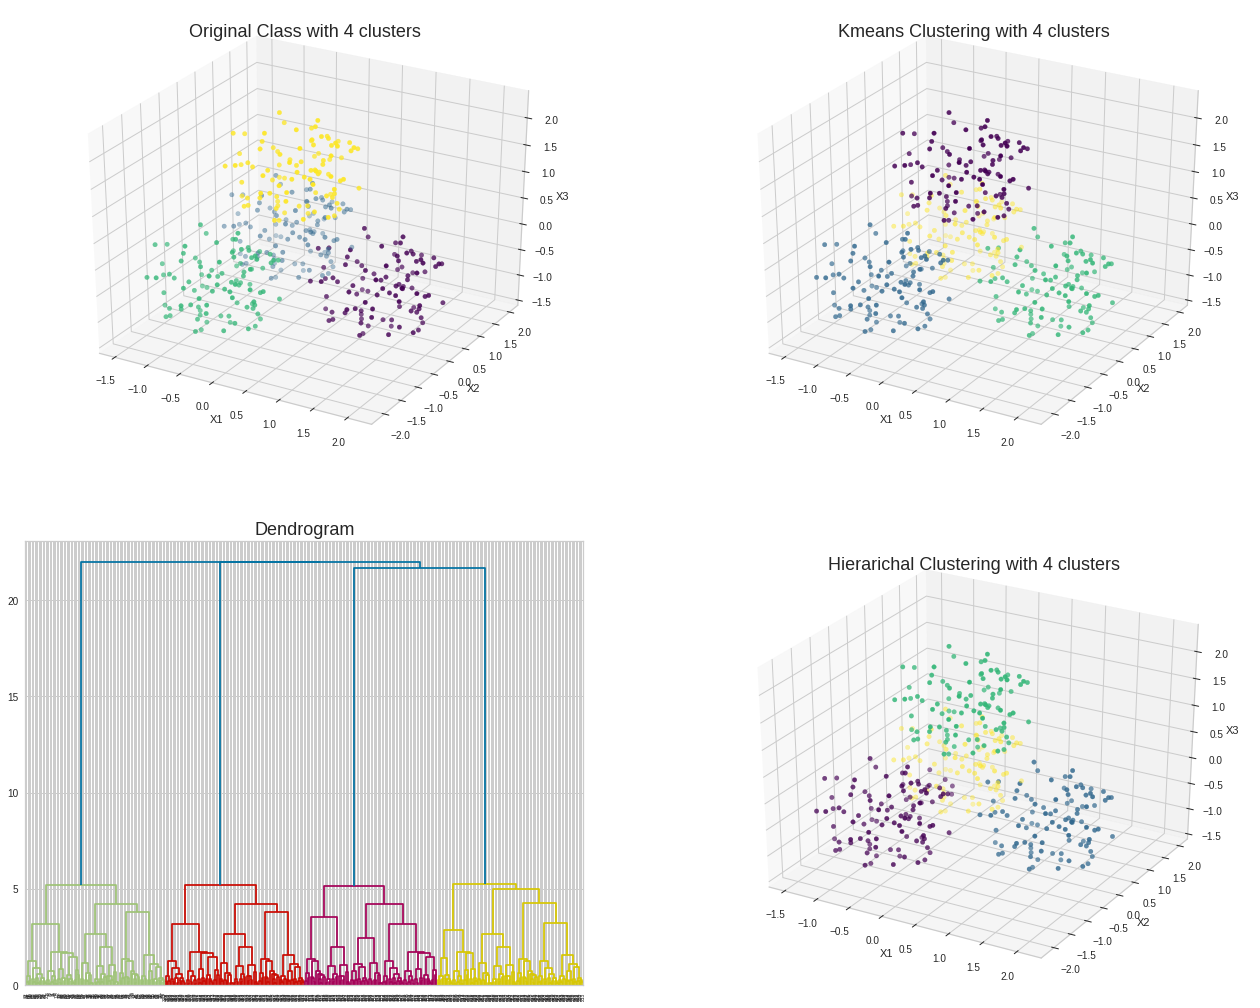

In [ ]:
model_graphs(Data3)

# Data4 -
## Kmeans and Hierarichal clustering give completely different scatter plots from each other and both are also different from the Original Class

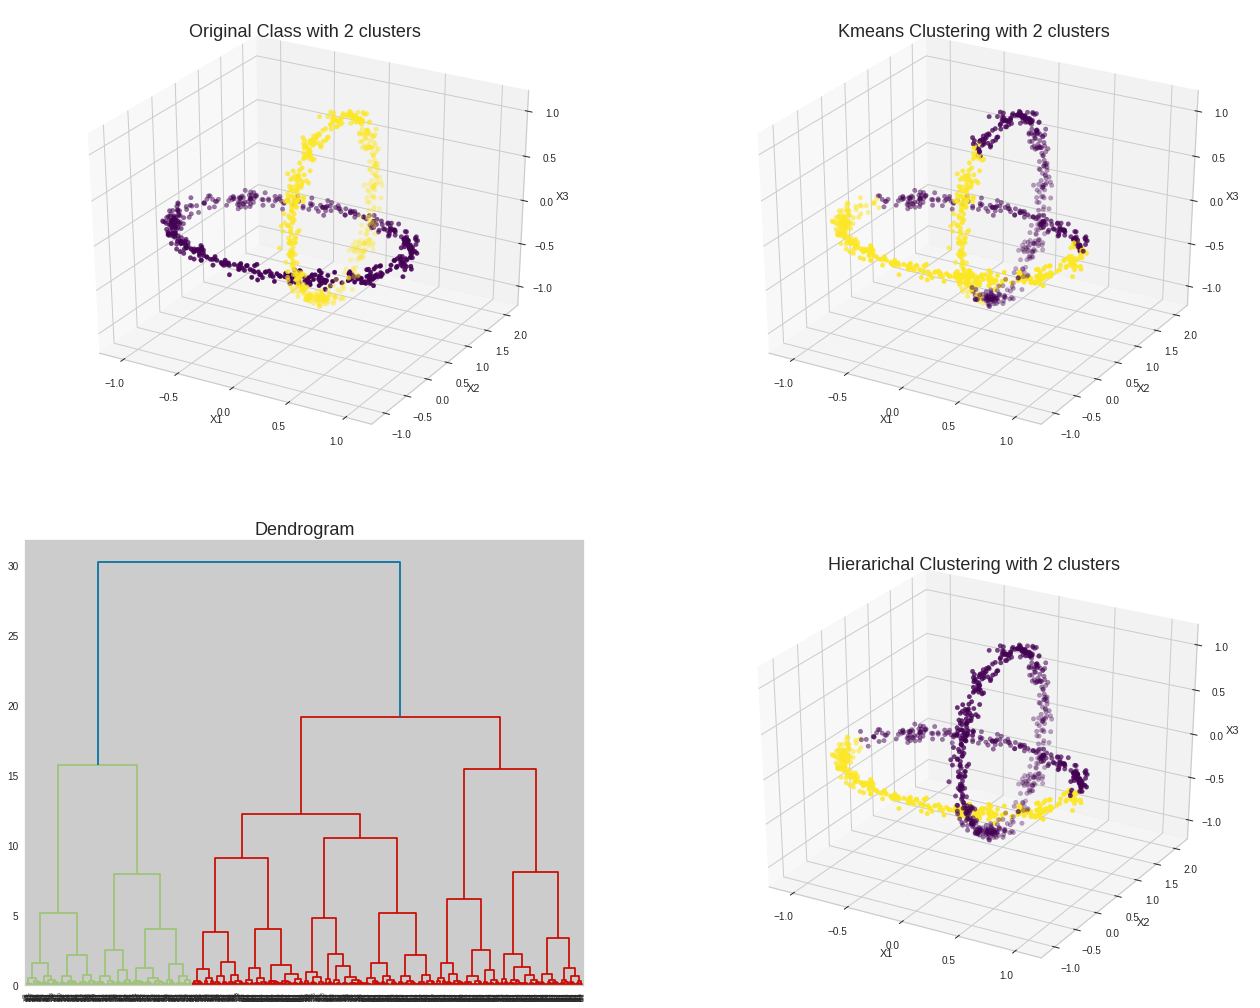

In [ ]:
model_graphs(Data4)

# Data5 -
## Kmeans and Hierarichal clustering give different scatter plots (almost opposite of each other), and both are completely different from the Original Class

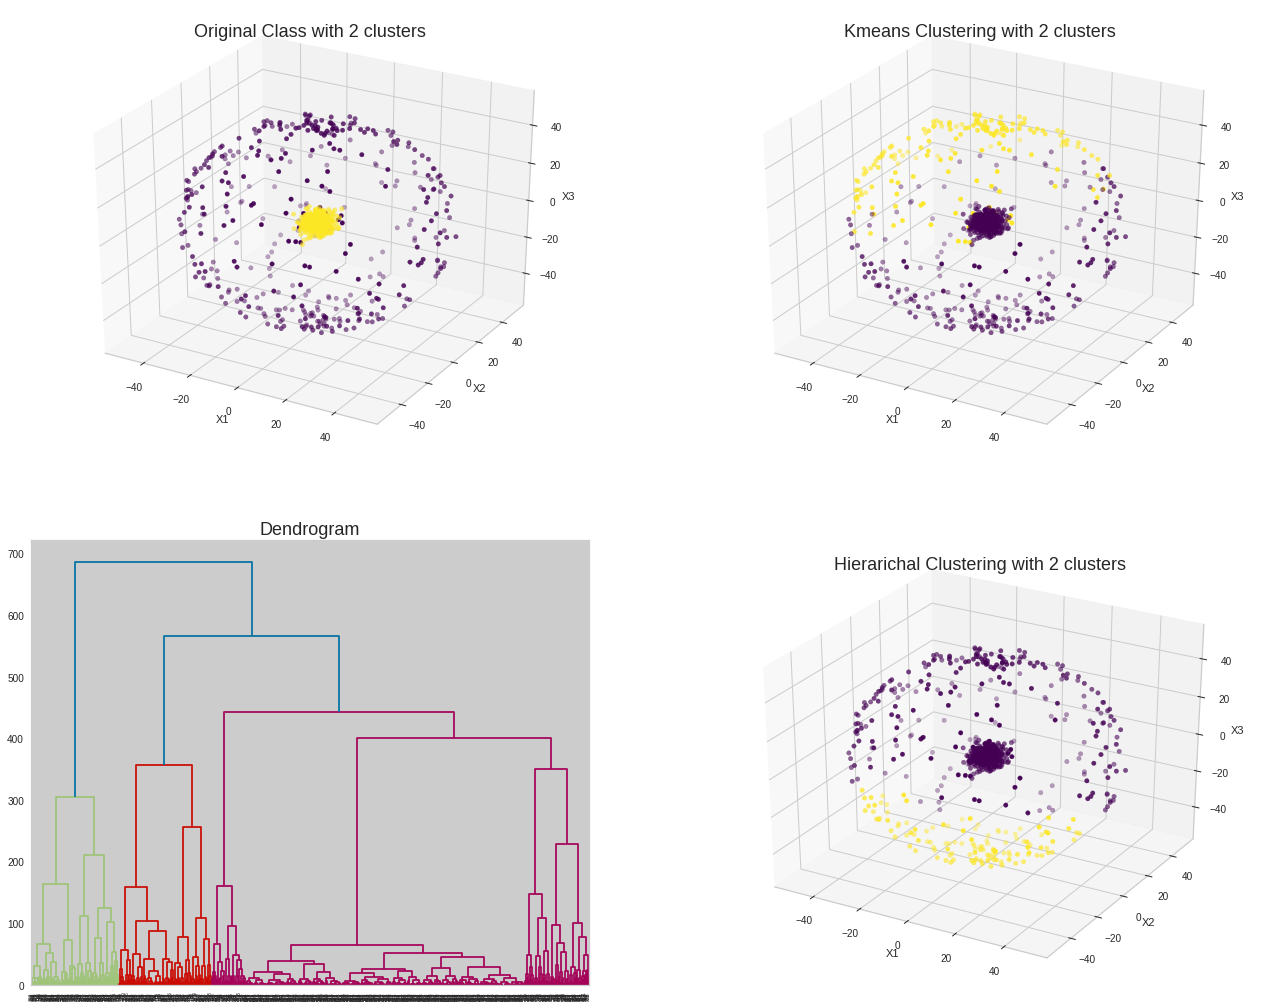

In [ ]:
model_graphs(Data5)

# Data6 -
## Kmeans clustering has a clear boundary between the 2 clusters. Hierarichal clustering has some overlap of its clusters data points. Both are slightly different from the Original Class.

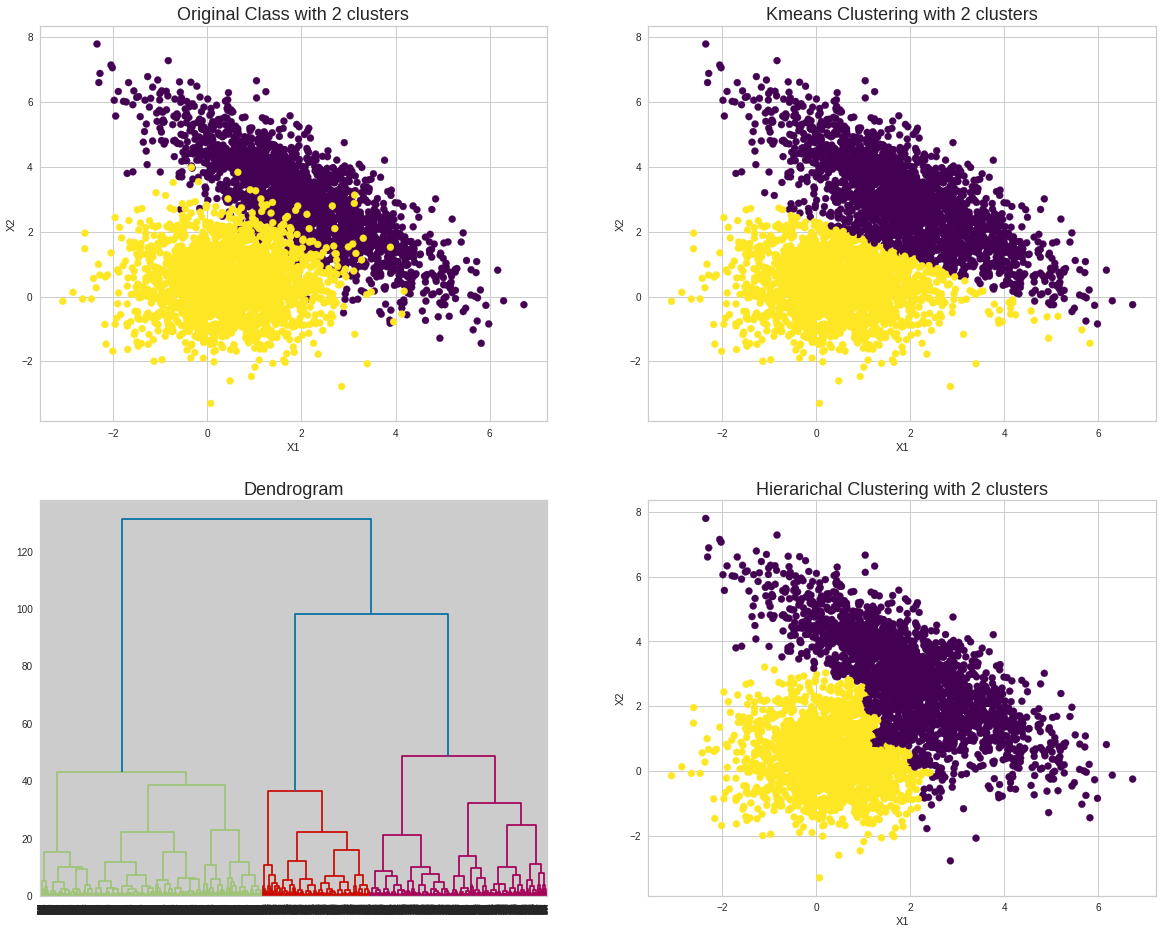

In [ ]:
model_graphs(Data6)

# Data7 -
## Kmeans and Hierarichal Clustering have similar scatter plots but with some variations. Both are completely different from the Original Class

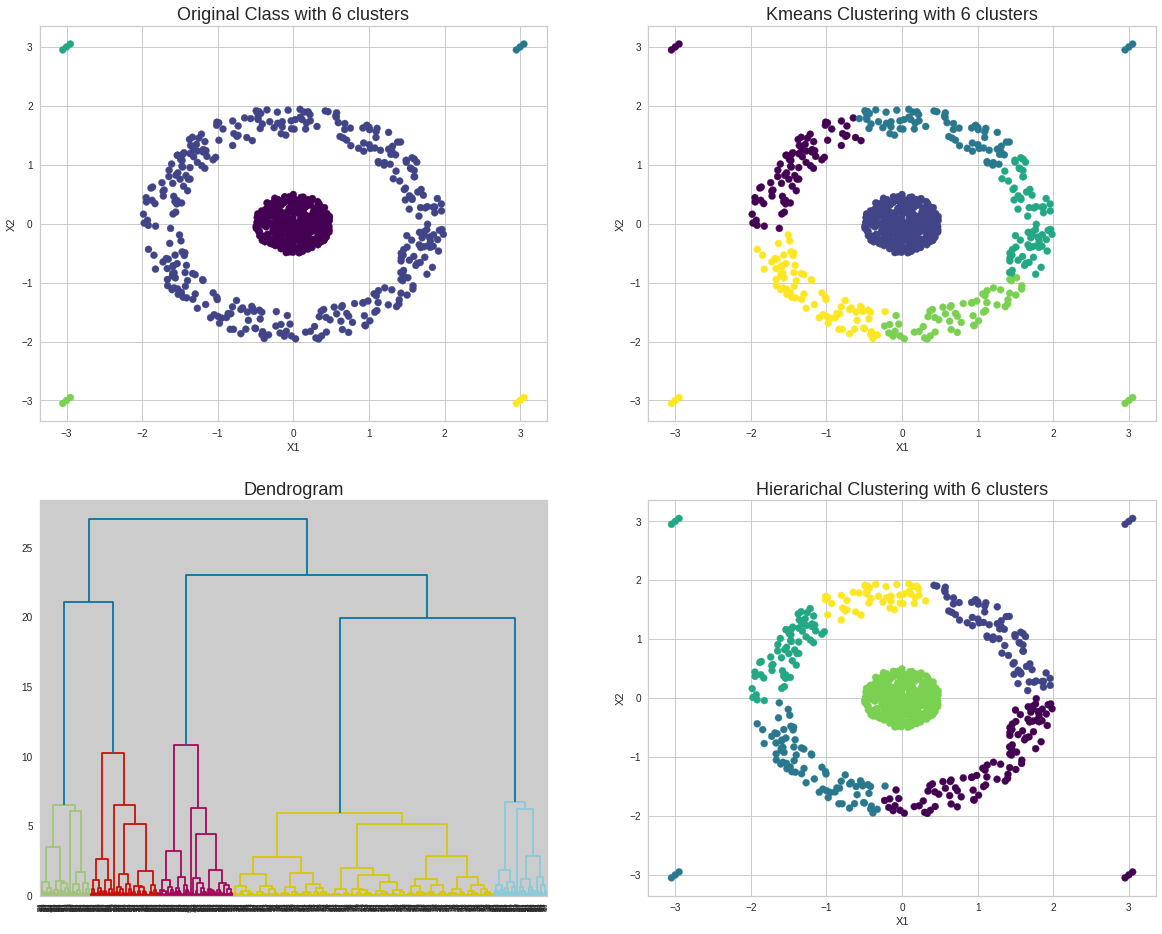

In [ ]:
model_graphs(Data7)

# Data8 -
## All 3 show the same scatter plots

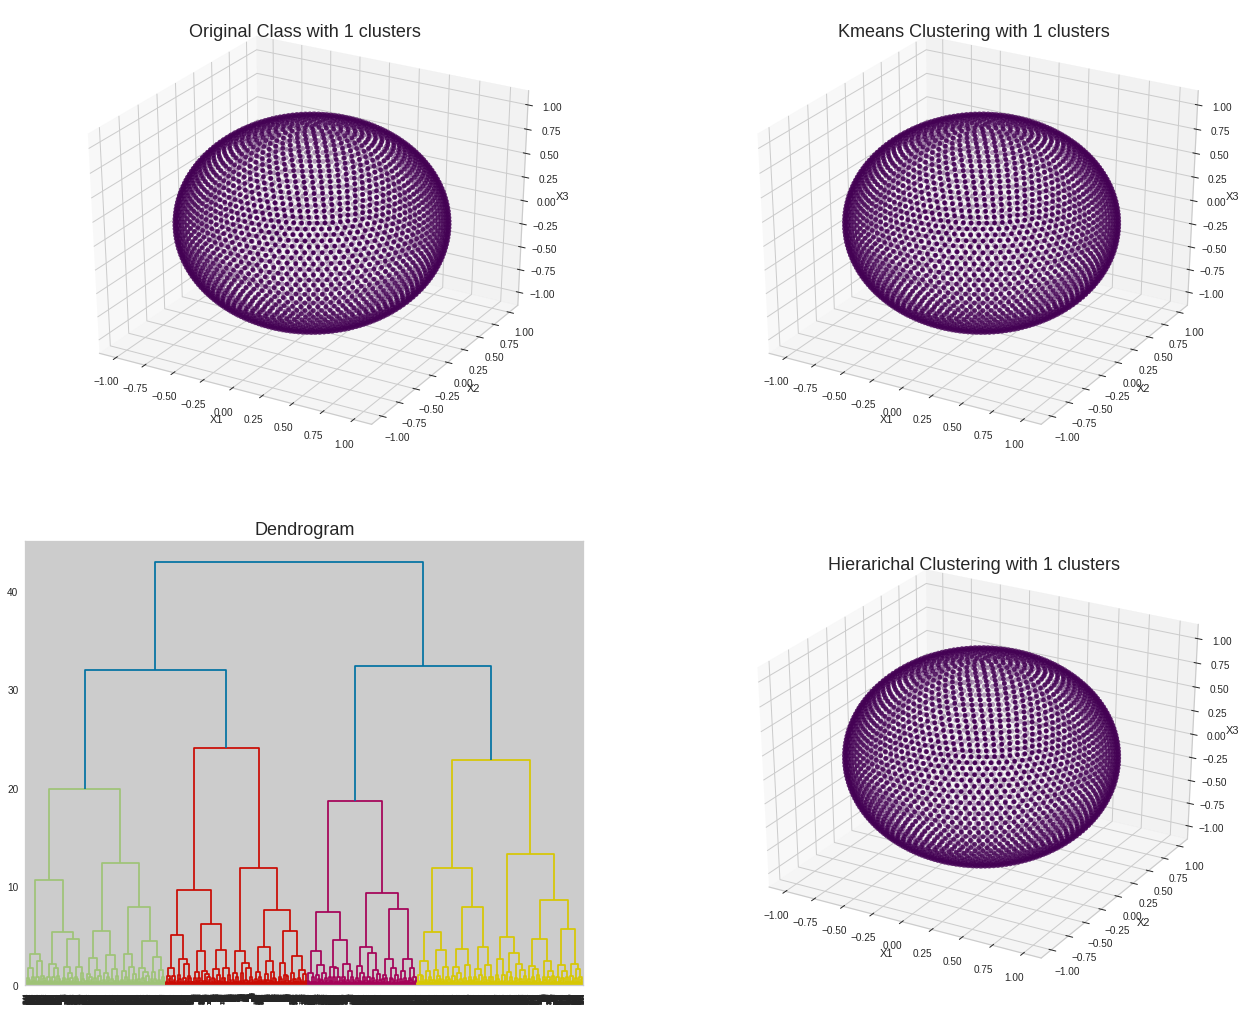

In [ ]:
model_graphs(Data8)

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# Task 2

# Reading the World Indicators data into World_ind dataframe

In [ ]:
World_ind = pd.read_csv('World Indicators.csv')
World_ind.head()

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


# There are missing values in some columns and the data types of all columns is not float
## The columns which need to be cleaned are Business Tax Rate, GDP and Health Exp/Capita

In [ ]:
World_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              199 non-null    float64
 1   Business Tax Rate       181 non-null    object 
 2   Days to Start Business  181 non-null    float64
 3   Energy Usage            136 non-null    float64
 4   GDP                     188 non-null    object 
 5   Health Exp % GDP        185 non-null    float64
 6   Health Exp/Capita       185 non-null    object 
 7   Hours to do Tax         180 non-null    float64
 8   Infant Mortality Rate   188 non-null    float64
 9   Internet Usage          199 non-null    float64
 10  Lending Interest        131 non-null    float64
 11  Life Expectancy Female  197 non-null    float64
 12  Life Expectancy Male    197 non-null    float64
 13  Mobile Phone Usage      196 non-null    float64
 14  Population 0-14         191 non-null    fl

# Cleaning the data
## For the column Business Tax Rate -
## We first remove the '%' symbol and replace it with a blank space and then convert the data type to float
## For the columns GDP and Health Exp/Capita -
## We remove the '%' and ',' symbols and replace them with a blank space, and then convert the data type to float

In [ ]:
World_ind['Business Tax Rate'] = World_ind['Business Tax Rate'].str.replace('%','')
World_ind['Business Tax Rate'] = World_ind['Business Tax Rate'].astype(float)

World_ind['GDP'] = World_ind['GDP'].str.replace('$','')
World_ind['GDP'] = World_ind['GDP'].str.replace(',','')
World_ind['GDP'] = World_ind['GDP'].astype(float)

World_ind['Health Exp/Capita'] = World_ind['Health Exp/Capita'].str.replace('$','')
World_ind['Health Exp/Capita'] = World_ind['Health Exp/Capita'].str.replace(',','')
World_ind['Health Exp/Capita'] = World_ind['Health Exp/Capita'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


# Now all the numerical columns are of data type float.

In [ ]:
World_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              199 non-null    float64
 1   Business Tax Rate       181 non-null    float64
 2   Days to Start Business  181 non-null    float64
 3   Energy Usage            136 non-null    float64
 4   GDP                     188 non-null    float64
 5   Health Exp % GDP        185 non-null    float64
 6   Health Exp/Capita       185 non-null    float64
 7   Hours to do Tax         180 non-null    float64
 8   Infant Mortality Rate   188 non-null    float64
 9   Internet Usage          199 non-null    float64
 10  Lending Interest        131 non-null    float64
 11  Life Expectancy Female  197 non-null    float64
 12  Life Expectancy Male    197 non-null    float64
 13  Mobile Phone Usage      196 non-null    float64
 14  Population 0-14         191 non-null    fl

# The % of null or missing values in each column of the dataset

In [ ]:
(World_ind.isnull().sum()/World_ind.shape[0])*100

Birth Rate                 4.326923
Business Tax Rate         12.980769
Days to Start Business    12.980769
Energy Usage              34.615385
GDP                        9.615385
Health Exp % GDP          11.057692
Health Exp/Capita         11.057692
Hours to do Tax           13.461538
Infant Mortality Rate      9.615385
Internet Usage             4.326923
Lending Interest          37.019231
Life Expectancy Female     5.288462
Life Expectancy Male       5.288462
Mobile Phone Usage         5.769231
Population 0-14            8.173077
Population 15-64           8.173077
Population 65+             8.173077
Population Urban           0.961538
Region                     0.000000
Country                    0.000000
dtype: float64

#The columns - Energy Usage and Lending Interest have more than 30% missing values. So, we can drop them entirely from the data

In [ ]:
World_ind_new = World_ind.copy()
World_ind_new.drop(['Energy Usage','Lending Interest'],axis=1,inplace=True)

# Dropping all rows with missing values from the data

In [ ]:
print('Number of rows before dropping: ',World_ind_new.shape)
World_ind_new.dropna(axis=0,inplace=True)
print('Number of rows after dropping: ',World_ind_new.shape)

Number of rows before dropping:  (208, 18)
Number of rows after dropping:  (171, 18)


# There are no more missing values in the data now so we can proceed with the clustering

In [ ]:
(World_ind_new.isnull().sum()/World_ind_new.shape[0])*100

Birth Rate                0.0
Business Tax Rate         0.0
Days to Start Business    0.0
GDP                       0.0
Health Exp % GDP          0.0
Health Exp/Capita         0.0
Hours to do Tax           0.0
Infant Mortality Rate     0.0
Internet Usage            0.0
Life Expectancy Female    0.0
Life Expectancy Male      0.0
Mobile Phone Usage        0.0
Population 0-14           0.0
Population 15-64          0.0
Population 65+            0.0
Population Urban          0.0
Region                    0.0
Country                   0.0
dtype: float64

In [ ]:
Scaled = MinMaxScaler()

# The range of the data values varies a lot column to column. For example: GDP values are >> than values in Birth rate column. So, to perform good clustering, we need to scale the data first within a range (between 0 and 1) which is done using the function MinMaxScaler. We fit and transform all the numerical columns data into the MinMax Scaler model.

In [ ]:
World_ind_scaled = Scaled.fit_transform(World_ind_new.iloc[:,:-2])
World_ind_scaled

array([[0.4047619 , 0.19231932, 0.03463203, ..., 0.53926702, 0.18803419,
        0.65093304],
       [0.9047619 , 0.13214394, 0.09379509, ..., 0.06282723, 0.08974359,
        0.35126235],
       [0.69047619, 0.1738736 , 0.04040404, ..., 0.16753927, 0.11111111,
        0.36663008],
       ...,
       [0.11904762, 0.11521016, 0.00577201, ..., 0.5078534 , 0.55555556,
        0.79034029],
       [0.16666667, 0.10130027, 0.00865801, ..., 0.42670157, 0.58119658,
        0.94072448],
       [0.28571429, 0.16449955, 0.2020202 , ..., 0.46073298, 0.23504274,
        0.87705818]])

# Performing internal validation of the model through Silhouette score (SC), Calinski Harabasz score (CH) and Dunn Index (DI) and finding the optimum number of clusters to be used for Kmeans and Hierarichal clustering

# SC =  (b − a)/ max{a,b},
# where a is the intra-cluster distance i.e average distance between points within a cluster
# and b is the inter-cluster distance i.e average distance a point and another point from nearest other cluster
# CH score = sum of inter-cluster dispersion / sum of intra-cluster dispersion
# Dunn Index = Minimum inter-cluster distance / Maximum intra-cluster distance

# Creating a loop from 2 to 10 as cluster number values for Kmeans model to find out optimal number of clusters. We store the values of sihouette score, CH score and dunn index in a list for each iteration

In [ ]:
World_ind_list1 = []
World_ind_list2 = []
World_ind_list3 = []

for i in range(2,10):
  World_model_test1 = KMeans(n_clusters=i)
  World_model_test1.fit(World_ind_scaled)
  World_ind_list1.append(silhouette_score(World_ind_scaled, World_model_test1.labels_, metric='euclidean'))
  World_ind_list2.append(metrics.calinski_harabasz_score(World_ind_scaled,World_model_test1.labels_))
  World_ind_list3.append(dunn(pairwise_distances(World_ind_scaled),World_model_test1.labels_))

# Making the sihouette visualizer plot for all values of k

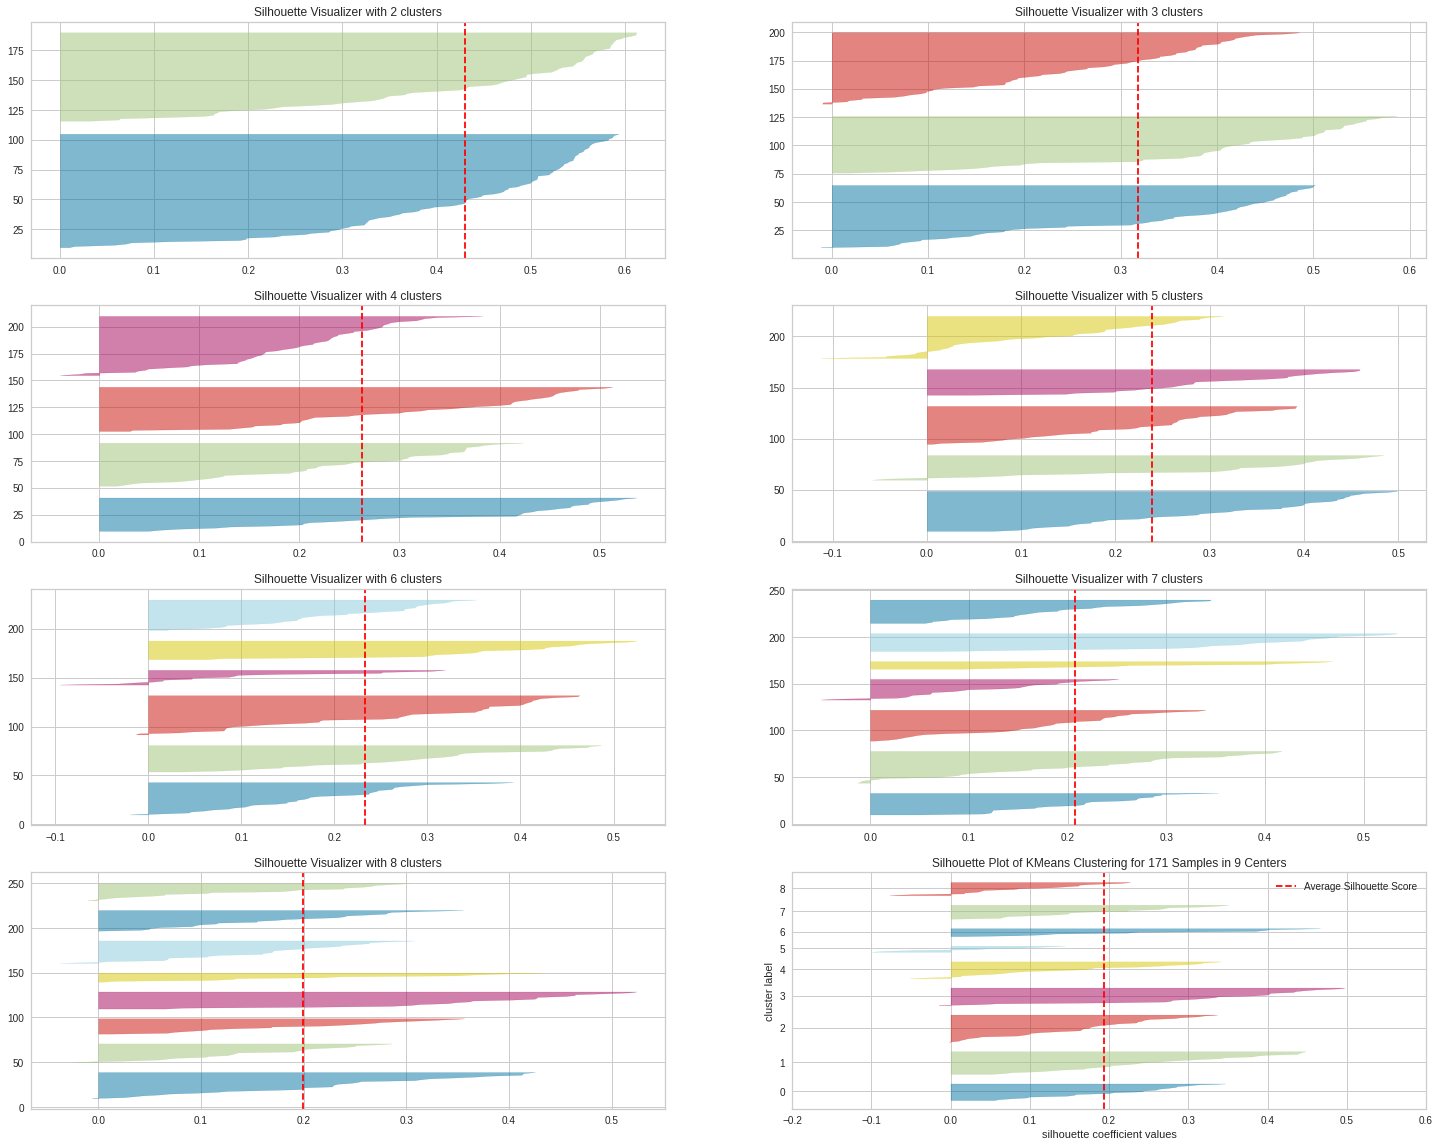

In [ ]:
list_s = []
fig = plt.figure(figsize=(25,20))
for i,j in zip(range(1,9),range(2,10)):
  plt.subplot(4,2,i)
  model = KMeans(n_clusters=j)
  model.fit(World_ind_scaled)
  list_s.append(silhouette_score(World_ind_scaled,model.labels_))
  visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
  plt.title('Silhouette Visualizer with {} clusters'.format(j))

  visualizer.fit(World_ind_scaled)
visualizer.show()

# Silhouette score for all cluster iterations

In [ ]:
for i,j in zip(range(2,10),list_s):
  print('Silhouette score for {} clusters: '.format(i), j)

Silhouette score for 2 clusters:  0.42987453131766545
Silhouette score for 3 clusters:  0.3175492476255927
Silhouette score for 4 clusters:  0.2621026540713908
Silhouette score for 5 clusters:  0.23902911547157307
Silhouette score for 6 clusters:  0.23310473732755224
Silhouette score for 7 clusters:  0.2071468046456447
Silhouette score for 8 clusters:  0.199235734297066
Silhouette score for 9 clusters:  0.19403110896915576


# CH score for all cluster iterations

In [ ]:
# Calinski-Harabasz coefficient score
for i,j in zip(range(len(World_ind_list2)),range(2,10)):
  print('Score with {} clusters: '.format(j),World_ind_list2[i])

Score with 2 clusters:  192.54525050508803
Score with 3 clusters:  152.98470876361588
Score with 4 clusters:  131.2355185811438
Score with 5 clusters:  111.9814871517288
Score with 6 clusters:  99.20656102694464
Score with 7 clusters:  88.65410727309249
Score with 8 clusters:  81.49975182523256
Score with 9 clusters:  76.01558217639193


# Dunn index for all cluster iterations

In [ ]:
# Dunn Index score
for i,j in zip(range(len(World_ind_list3)),range(2,10)):
  print('Score with {} clusters: '.format(j),World_ind_list3[i])

Score with 2 clusters:  0.12192108167876109
Score with 3 clusters:  0.150141439870042
Score with 4 clusters:  0.11530374503991707
Score with 5 clusters:  0.16382434580533192
Score with 6 clusters:  0.16382434580533192
Score with 7 clusters:  0.13897082391409735
Score with 8 clusters:  0.12811307884694217
Score with 9 clusters:  0.1293386518815383


# The Silhouette score and CH score for 2 clusters is the highest when compared to other clusters. Thus, we can choose k = 2 as the optimal number of clusters for Kmeans

# Dendogram of the dataset -
## 2 clusters seems to be the optimal value for Hierarichal clustering from the dendogram

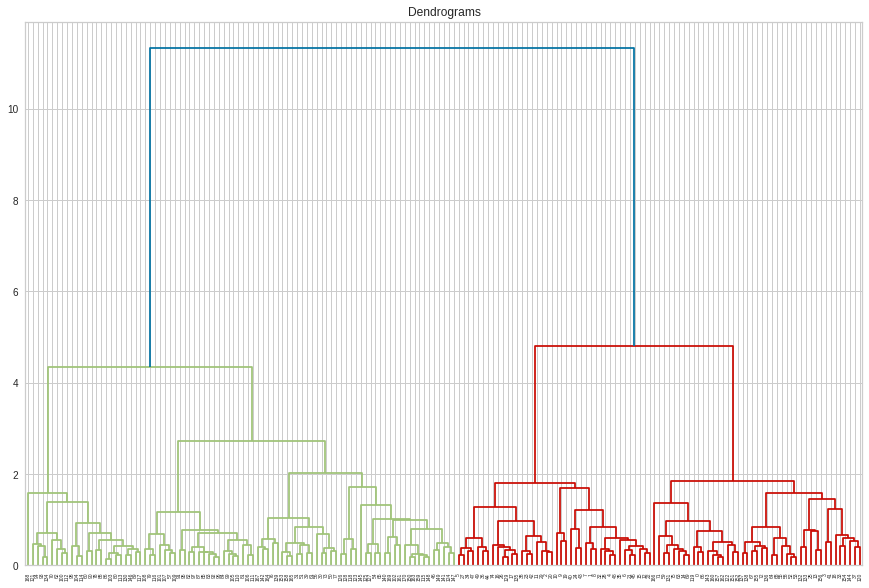

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("Dendrograms")
shc.dendrogram(shc.linkage(World_ind_scaled,method='ward'))
plt.show()

# Putting k = 2 clusters in final model for Kmeans and Hierarichal clustering techniques. Adding predicted labels from both methods to the original dataset

In [ ]:
World_model = KMeans(n_clusters = 2,random_state=13)
World_model.fit(World_ind_scaled)
World_ind_new['Kmeans Labels'] = World_model.labels_

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster.fit(World_ind_scaled)
World_ind_new['Hierarchical Labels']=cluster.labels_

# Comparing the Silhouette score, CH score and Dunn Index for both Kmeans and Hierarichal clustering.

In [ ]:
print('KMeans Silhouette Score:',metrics.silhouette_score(World_ind_scaled,World_ind_new['Kmeans Labels']))
print('Hierarchical Silhouette Score:',metrics.silhouette_score(World_ind_scaled,World_ind_new['Hierarchical Labels']))

KMeans Silhouette Score: 0.42987453131766545
Hierarchical Silhouette Score: 0.4176400922367597


In [ ]:
print('KMeans CH Score:',metrics.calinski_harabasz_score(World_ind_scaled,World_ind_new['Kmeans Labels']))
print('Hierarchical CH Score:',metrics.calinski_harabasz_score(World_ind_scaled,World_ind_new['Hierarchical Labels']))

KMeans CH Score: 192.54525050508803
Hierarchical CH Score: 184.87996192103543


In [ ]:
print('KMeans Dunn Index Score:',dunn(pairwise_distances(World_ind_scaled),World_ind_new['Kmeans Labels']))
print('Hierarchical Dunn Index Score:',dunn(pairwise_distances(World_ind_scaled),World_ind_new['Hierarchical Labels']))

KMeans Dunn Index Score: 0.12192108167876109
Hierarchical Dunn Index Score: 0.14142629053178704


# After internal validation, we can see from the Silhouette and CH score that Kmeans performs slightly better than Hierarichal. Thus we select Kmeans as the best clustering method for the World Indicators dataset

# Number of countries in each cluster

In [ ]:
World_ind_new.groupby('Kmeans Labels')['Country'].count()

Kmeans Labels
0    96
1    75
Name: Country, dtype: int64

# Comparing average of each column grouped by the 2 clusters. Observations -
## Cluster 0 contains the 'richer' countries, having higher GDP, Health Exp/Capita, Internet Usage, Life Expectancy and a lower population below 65 years.
## It is also easier to start a business in these countries and takes lesser time on average to do tax.

In [ ]:
World_ind_new.groupby('Kmeans Labels')[World_ind_new.columns].mean()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Kmeans Labels,Hierarchical Labels
Kmeans Labels,,,,,,,,,,,,,,,,,,
0,0.014375,39.665625,26.322917,6.754220e+11,0.071958,1827.843750,268.427083,0.009646,0.565625,79.343750,73.562500,1.190625,0.207104,0.682646,0.110135,0.684958,0.0,0.916667
1,0.032613,52.192000,36.360000,7.207342e+10,0.062920,127.093333,303.866667,0.050120,0.101333,63.026667,59.773333,0.644000,0.394280,0.570373,0.035360,0.392067,1.0,0.000000


# List of the 96 countries in first cluster

In [ ]:
World_ind_new[World_ind_new['Kmeans Labels']==0]['Country'].unique()

array(['Egypt, Arab Rep.', 'Mauritius', 'Morocco', 'Seychelles',
       'Tunisia', 'Armenia', 'Azerbaijan', 'Brunei Darussalam', 'China',
       'Georgia', 'Japan', 'Kazakhstan', 'Korea, Rep.', 'Malaysia',
       'Singapore', 'Sri Lanka', 'Thailand', 'Vietnam', 'Albania',
       'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',
       'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Macedonia, FYR', 'Malta', 'Moldova', 'Montenegro', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation',
       'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Bahrain',
       'Iran, Islamic Rep.', 'Israel', 'Jordan', 'Kuwait', 'Lebanon',
       'Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates',
       'Australia', 'Fiji',

# List of the 75 countries in the second cluster

In [ ]:
World_ind_new[World_ind_new['Kmeans Labels']==1]['Country'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon',
       'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya',
       'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'South Africa',
       'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Uganda', 'Zambia',
       'Afghanistan', 'Bangladesh', 'Bhutan', 'Cambodia', 'India',
       'Indonesia', 'Kyrgyz Republic', 'Lao PDR', 'Mongolia', 'Nepal',
       'Pakistan', 'Philippines', 'Tajikistan', 'Timor-Leste',
       'Uzbekistan', 'Iraq', 'Yemen, Rep.', 'Kiribati',
       'Micronesia, Fed. Sts.', 'Papua New Guinea', 'Solomon Islands',
       'Tonga', 'Vanuatu', 'Belize', 'Bolivia', 'Gu

# Plotting 3 scatter plots of 2 columns at a time and coloured by the Kmeans clusters

# Scatter plot of Birth Rate vs Internet Usage
## Clear demarcation is seen between the 2 clusters. For higher values of Birth rate, the Internet usage is less and vice-versa.

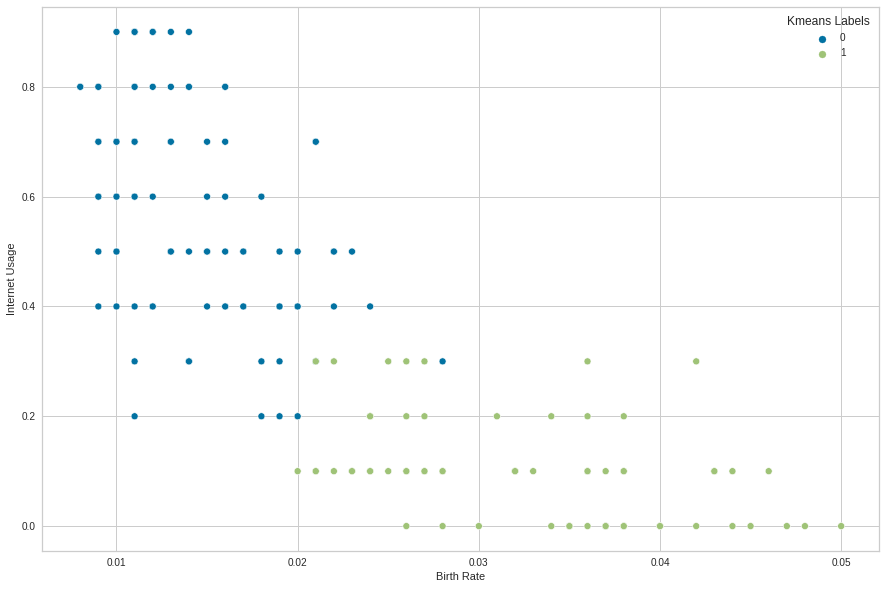

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x = World_ind_new['Birth Rate'],y = World_ind_new['Internet Usage'],hue=World_ind_new['Kmeans Labels'])
plt.show()

# Scatter plot of Mobile Phone Usage vs Population 15-64
## There is a postive relationship. As the percent of 15-64 population increases, the Mobile phone usage also increases.

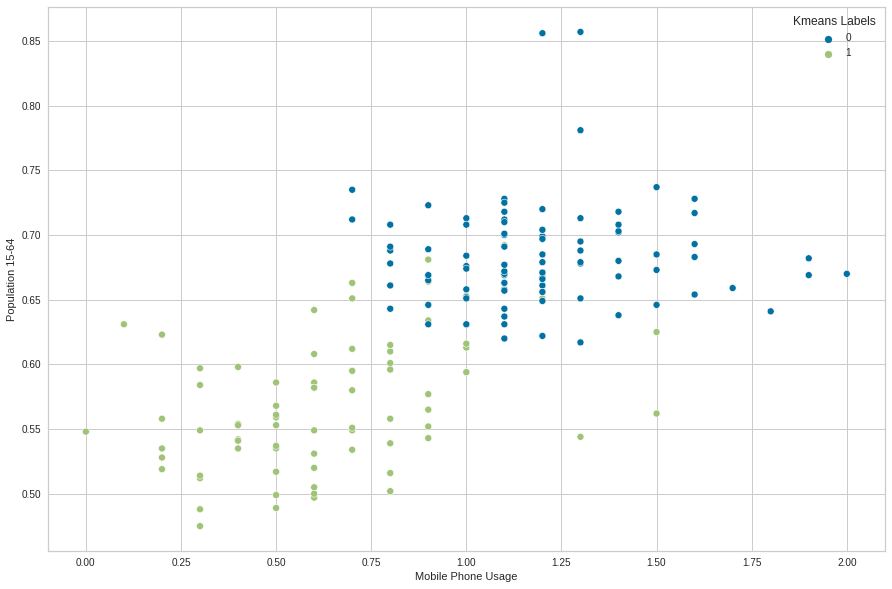

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x = World_ind_new['Mobile Phone Usage'],y = World_ind_new['Population 15-64'],hue=World_ind_new['Kmeans Labels'])
plt.show()

# Scatter plot of Health Exp % GDP vs Internet Usage
## Clear difference is seen between the 2 clusters. Cluster 0 countries have higher Internet Usage

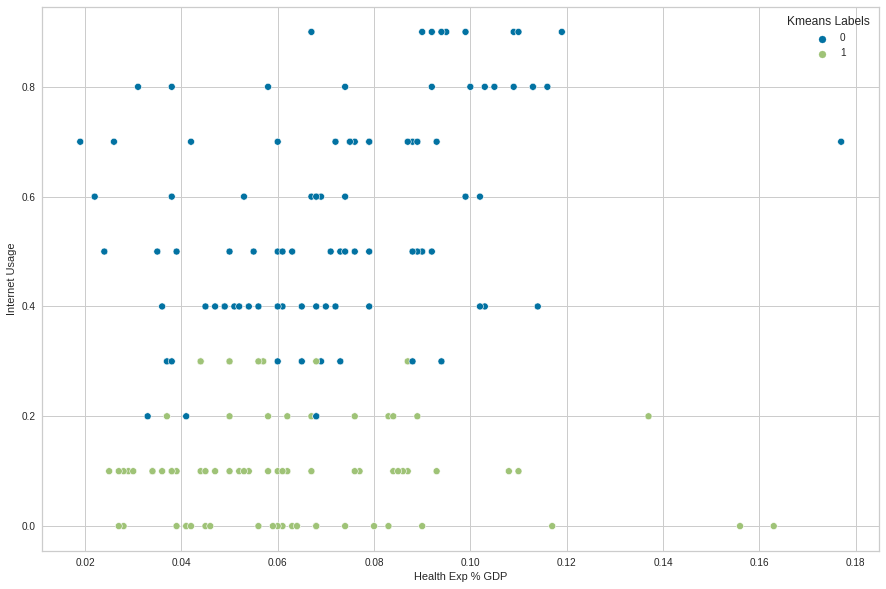

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x = World_ind_new['Health Exp % GDP'],y = World_ind_new['Internet Usage'],hue=World_ind_new['Kmeans Labels'])
plt.show()